In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML, display
import tabulate

In [2]:
csv1 = pd.read_csv("../../data/number_conflicting_chunks.csv")

csv1 = csv1.rename(columns={"chunks": "chunks_corretos"})

print(f"CSV has {len(csv1)} projects.")

CSV has 2731 projects.


In [3]:
csv1.head()

,id,project,chunks_corretos
0,3518171,sebastianbenz/Jnario,10372
1,3661343,CCI-MIT/XCoLab,6889
2,2524488,apache/accumulo,5141
3,65885,android/platform_frameworks_base,4446
4,1006053,TeamDev-Ltd/OpenFaces,3723


In [4]:
csv2 = pd.read_csv("../../data/number_chunks__updated_repos.csv")

print(f"CSV has {len(csv1)} projects.")

CSV has 2731 projects.


In [5]:
csv2.head()

,project_id,project,chunks,project_new_ownername
0,65906,android/platform_packages_apps_settings,58177,aosp-mirror/platform_packages_apps_settings
1,2970227,AOKP/packages_apps_Settings,55452,NaN
2,65885,android/platform_frameworks_base,41378,aosp-mirror/platform_frameworks_base
3,3518171,sebastianbenz/Jnario,10384,NaN
4,4212733,RealVNC/android-frameworks-base-with-screensho...,10346,VNCAutomotive/android-frameworks-base-with-scr...


In [6]:
df_inner = pd.merge(csv1, csv2, on='project', how='inner')

In [7]:
len(df_inner)

2731

In [8]:
df_inner.head()

,id,project,chunks_corretos,project_id,chunks,project_new_ownername
0,3518171,sebastianbenz/Jnario,10372,3518171,10384,NaN
1,3661343,CCI-MIT/XCoLab,6889,3661343,7048,NaN
2,2524488,apache/accumulo,5141,2524488,6086,NaN
3,65885,android/platform_frameworks_base,4446,65885,41378,aosp-mirror/platform_frameworks_base
4,1006053,TeamDev-Ltd/OpenFaces,3723,1006053,4859,TeamDev-Archive/OpenFaces


In [9]:
df_inner[df_inner["id"] == 65885]

,id,project,chunks_corretos,project_id,chunks,project_new_ownername
3,65885,android/platform_frameworks_base,4446,65885,41378,aosp-mirror/platform_frameworks_base


In [10]:
csv1[csv1["id"] == 65885]

,id,project,chunks_corretos
3,65885,android/platform_frameworks_base,4446


In [11]:
csv2[csv2["project_id"] == 65885]

,project_id,project,chunks,project_new_ownername
2,65885,android/platform_frameworks_base,41378,aosp-mirror/platform_frameworks_base


In [12]:
df_inner[["chunks_corretos", "chunks"]]

,chunks_corretos,chunks
0,10372,10384
1,6889,7048
2,5141,6086
3,4446,41378
4,3723,4859
...,...,...
2726,1,1
2727,1,1
2728,1,4
2729,1,1


In [13]:
result = df_inner[["id", "project", "project_new_ownername", "chunks_corretos"]]

result = result.rename(columns={"chunks_corretos": "chunks"})

result

,id,project,project_new_ownername,chunks
0,3518171,sebastianbenz/Jnario,NaN,10372
1,3661343,CCI-MIT/XCoLab,NaN,6889
2,2524488,apache/accumulo,NaN,5141
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723
...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1
2727,3468682,htdvisser/Skt,REPO_NOT_FOUND,1
2728,2130242,justjoheinz/STLDroid,NaN,1
2729,3355503,SpoutDev/BukkitBridge,NaN,1


In [14]:
result = result.assign(repo_not_found = lambda d: d["project_new_ownername"] == "REPO_NOT_FOUND")

In [15]:
result.project_new_ownername = result.project_new_ownername.map(lambda d: np.nan if d == "REPO_NOT_FOUND" else d)

In [16]:
result.project_new_ownername.str.contains('REPO_NOT_FOUND', regex=False).sum()

0

In [17]:
result.sample(n=10)

,id,project,project_new_ownername,chunks,repo_not_found
2506,1163467,jenkinsci/claim-plugin,NaN,1,False
2082,967913,fadmaa/grefine-rdf-extension,NaN,2,False
59,4298816,SeqWare/seqware,NaN,529,False
1979,2522807,bryceac/RMD-Calculator,NaN,3,False
241,1777352,splunk/splunk-sdk-java,NaN,128,False
2708,1218399,Crindigo/Journey-of-Souls,NaN,1,False
667,1794210,joliebig/featurehouse,NaN,29,False
269,1311849,atlasapi/atlas-search,NaN,107,False
1219,1163828,jenkinsci/violations-plugin,NaN,9,False
965,2415538,abiquo/commons-amqp,NaN,14,False


In [18]:
# result.assign(repo_not_found = lambda d: d["project_new_ownername"])

In [19]:
# result.assign(repo_not_found = lambda d: True if d["project_new_ownername"] == "REPO_NOT_FOUND" else False)

In [20]:
result.to_csv("output.csv", index=False)

## Selection of Projects

In [21]:
result.head()

,id,project,project_new_ownername,chunks,repo_not_found
0,3518171,sebastianbenz/Jnario,NaN,10372,False
1,3661343,CCI-MIT/XCoLab,NaN,6889,False
2,2524488,apache/accumulo,NaN,5141,False
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False


### Selecting projects with #chunks >= 1000

#### Using the old incorrect #chunks data

In [22]:
df_inner[df_inner["chunks"] >= 1000]

,id,project,chunks_corretos,project_id,chunks,project_new_ownername
0,3518171,sebastianbenz/Jnario,10372,3518171,10384,NaN
1,3661343,CCI-MIT/XCoLab,6889,3661343,7048,NaN
2,2524488,apache/accumulo,5141,2524488,6086,NaN
3,65885,android/platform_frameworks_base,4446,65885,41378,aosp-mirror/platform_frameworks_base
4,1006053,TeamDev-Ltd/OpenFaces,3723,1006053,4859,TeamDev-Archive/OpenFaces
...,...,...,...,...,...,...
518,807037,miurahr/nevernote,42,807037,1592,NaN
804,65904,android/platform_packages_apps_packageinstaller,20,65904,2568,aosp-mirror/platform_packages_apps_packageinst...
850,2387149,CyanogenMod/android_packages_apps_PackageInsta...,18,2387149,2072,NaN
906,1553790,eclipse/jgit,16,1553790,1669,NaN


#### Using the correct #chunks data:

In [23]:
result[result["chunks"] >= 1000]

,id,project,project_new_ownername,chunks,repo_not_found
0,3518171,sebastianbenz/Jnario,NaN,10372,False
1,3661343,CCI-MIT/XCoLab,NaN,6889,False
2,2524488,apache/accumulo,NaN,5141,False
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False
5,4212733,RealVNC/android-frameworks-base-with-screensho...,VNCAutomotive/android-frameworks-base-with-scr...,2836,False
6,3405664,jgralab/jgralab,NaN,2590,False
7,2902099,AOKP/frameworks_base_disabled,NaN,2498,False
8,3518362,adetaylor/android-frameworks-base-with-remote-...,NaN,2240,False
9,3129899,IceColdSandwich/android_frameworks_base,NaN,2240,False


### Searching a good N for the filter `#chunks >= N`

In [24]:
data = []
min_chunks = []
num_projects = []

for i in range(1,100):
    n = 10 * i
    selection = result[result["chunks"] >= n]
    data.append([n, len(selection)])
    min_chunks.append(n)
    num_projects.append(len(selection))
    
# data

chunks_projects = pd.DataFrame({"min_chunks": min_chunks, "num_projects": num_projects})

chunks_projects

# min_chunks, num_projects

,min_chunks,num_projects
0,10,1182
1,20,822
2,30,656
3,40,541
4,50,463
...,...,...
94,950,29
95,960,29
96,970,29
97,980,29


In [25]:
chunks_projects[(chunks_projects["min_chunks"] >= 200) & 
                (chunks_projects["min_chunks"] <= 600)].to_clipboard(index=False)

<AxesSubplot:xlabel='min_chunks', ylabel='num_projects'>

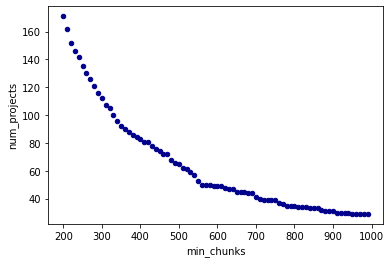

In [26]:
chunks_projects[chunks_projects["min_chunks"] >= 200].plot.scatter(x="min_chunks", y="num_projects", c="DarkBlue")

# ax1 = df.plot.scatter(x='length',
#                       y='width',
#                       c='DarkBlue')

In [27]:
chunks_projects[chunks_projects["min_chunks"] == 900]

,min_chunks,num_projects
89,900,31


In [28]:
# Minimum number of chunks per project
N = 400

selecao = result[result["chunks"] >= N]

print(f"{len(selecao)} projects with {N} of more chunks.")

selecao

83 projects with 400 of more chunks.


,id,project,project_new_ownername,chunks,repo_not_found
0,3518171,sebastianbenz/Jnario,NaN,10372,False
1,3661343,CCI-MIT/XCoLab,NaN,6889,False
2,2524488,apache/accumulo,NaN,5141,False
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False
...,...,...,...,...,...
78,3548254,thinkaurelius/titan,NaN,428,False
79,229738,jdbi/jdbi,NaN,427,False
80,2996011,imglib/imglib2,NaN,422,False
81,3943003,wala/WALA,NaN,406,False


<AxesSubplot:>

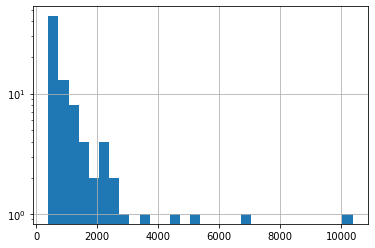

In [29]:
selecao["chunks"].hist(bins=30, log=True)


Com os dados de #chunks corretos temos esse histograma:

<AxesSubplot:>

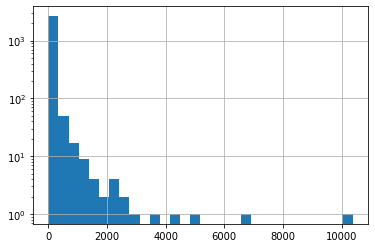

In [30]:
result["chunks"].hist(bins=30, log=True)

Com os dados de #chunks errados havia esse histograma de #chunks:

<AxesSubplot:>

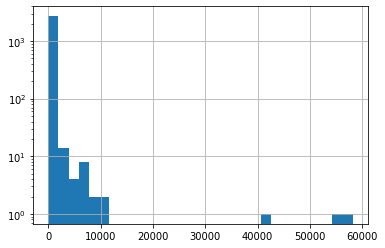

In [31]:
df_inner["chunks"].hist(bins=30, log=True)

In [32]:
api_data = pd.read_csv("../../data/projects_data_from_github_api.csv")

In [33]:
api_data

,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,mergeCommitAllowed,primaryLanguage,rebaseMergeAllowed,squashMergeAllowed,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
0,/0xCopy/RelaxFactory,18,False,False,True,Java,True,True,14,18,2,3,5,7,629,3,15,10
1,/3111H-Focus/Father-Focus,4,False,False,True,Java,True,True,2,61,0,1,4,4,223,3,1,0
2,/360/360-Engine-for-Android,51,False,False,True,Java,True,True,1,3,0,3,23,25,492,14,3,0
3,/3scale-labs/3scale_ws_api_for_java,27,False,False,True,Java,True,True,14,25,0,45,29,30,90,19,3,20
4,/4ntoine/Firmata,38,False,False,True,Java,True,True,9,2,0,7,18,18,28,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,/structr/structr,600,False,False,True,Java,True,True,472,76,0,57,130,135,13075,26,18,65
2593,/stupidsing/suite,2,False,False,True,Java,True,True,4,10,0,1,2,2,13192,2,11,0
2594,/subgraph/Orchid,216,False,False,True,Java,True,True,21,15,0,36,66,86,539,5,3,2
2595,/suggitpe/Katas,3,False,False,True,Java,True,True,0,0,0,1,0,0,23,1,2,0


In [34]:
api_data2 = api_data.assign(project_actual_ownername = lambda d: d.resourcePath.str[1:])

api_data2

# df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
#           temp_k=lambda x: (x['temp_f'] +  459.67) * 5 / 9)

# df.assign(temp_f=df['temp_c'] * 9 / 5 + 32)

,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,mergeCommitAllowed,primaryLanguage,rebaseMergeAllowed,squashMergeAllowed,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags,project_actual_ownername
0,/0xCopy/RelaxFactory,18,False,False,True,Java,True,True,14,18,2,3,5,7,629,3,15,10,0xCopy/RelaxFactory
1,/3111H-Focus/Father-Focus,4,False,False,True,Java,True,True,2,61,0,1,4,4,223,3,1,0,3111H-Focus/Father-Focus
2,/360/360-Engine-for-Android,51,False,False,True,Java,True,True,1,3,0,3,23,25,492,14,3,0,360/360-Engine-for-Android
3,/3scale-labs/3scale_ws_api_for_java,27,False,False,True,Java,True,True,14,25,0,45,29,30,90,19,3,20,3scale-labs/3scale_ws_api_for_java
4,/4ntoine/Firmata,38,False,False,True,Java,True,True,9,2,0,7,18,18,28,2,1,0,4ntoine/Firmata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,/structr/structr,600,False,False,True,Java,True,True,472,76,0,57,130,135,13075,26,18,65,structr/structr
2593,/stupidsing/suite,2,False,False,True,Java,True,True,4,10,0,1,2,2,13192,2,11,0,stupidsing/suite
2594,/subgraph/Orchid,216,False,False,True,Java,True,True,21,15,0,36,66,86,539,5,3,2,subgraph/Orchid
2595,/suggitpe/Katas,3,False,False,True,Java,True,True,0,0,0,1,0,0,23,1,2,0,suggitpe/Katas


In [35]:
result

,id,project,project_new_ownername,chunks,repo_not_found
0,3518171,sebastianbenz/Jnario,NaN,10372,False
1,3661343,CCI-MIT/XCoLab,NaN,6889,False
2,2524488,apache/accumulo,NaN,5141,False
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False
...,...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1,False
2727,3468682,htdvisser/Skt,NaN,1,True
2728,2130242,justjoheinz/STLDroid,NaN,1,False
2729,3355503,SpoutDev/BukkitBridge,NaN,1,False


### Adding new column "project_actual_ownername"


In [36]:
result2 = result.assign(project_actual_ownername = result["project_new_ownername"].combine_first(result["project"]))

In [37]:
result2

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername
0,3518171,sebastianbenz/Jnario,NaN,10372,False,sebastianbenz/Jnario
1,3661343,CCI-MIT/XCoLab,NaN,6889,False,CCI-MIT/XCoLab
2,2524488,apache/accumulo,NaN,5141,False,apache/accumulo
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces
...,...,...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1,False,pingpongboss/Phone-Modem
2727,3468682,htdvisser/Skt,NaN,1,True,htdvisser/Skt
2728,2130242,justjoheinz/STLDroid,NaN,1,False,justjoheinz/STLDroid
2729,3355503,SpoutDev/BukkitBridge,NaN,1,False,SpoutDev/BukkitBridge


In [38]:
# result[result["project_new_ownername"].combine_first(result["project"])\
# .str.contains('aosp-mirror/platform_frameworks_base', regex=False)]

In [39]:
len(result2)

2731

In [40]:
len(api_data2)

2597

In [41]:
api_and_newnames = pd.merge(result2, api_data2, on='project_actual_ownername', how='left')

api_and_newnames

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
0,3518171,sebastianbenz/Jnario,NaN,10372,False,sebastianbenz/Jnario,/sebastianbenz/Jnario,133.0,False,False,...,146.0,35.0,0.0,19.0,32.0,37.0,1303.0,9.0,19.0,20.0
1,3661343,CCI-MIT/XCoLab,NaN,6889,False,CCI-MIT/XCoLab,/CCI-MIT/XCoLab,15.0,False,False,...,9.0,288.0,0.0,8.0,10.0,10.0,10045.0,25.0,97.0,0.0
2,2524488,apache/accumulo,NaN,5141,False,apache/accumulo,/apache/accumulo,864.0,False,False,...,628.0,1394.0,0.0,88.0,333.0,351.0,10876.0,131.0,3.0,38.0
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base,/aosp-mirror/platform_frameworks_base,9532.0,False,False,...,0.0,111.0,0.0,911.0,5360.0,5901.0,566598.0,763.0,250.0,1034.0
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces,/TeamDev-Archive/OpenFaces,28.0,False,False,...,173.0,3.0,0.0,19.0,14.0,15.0,3293.0,18.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1,False,pingpongboss/Phone-Modem,/pingpongboss/Phone-Modem,30.0,False,False,...,0.0,0.0,0.0,5.0,9.0,9.0,24.0,2.0,1.0,0.0
2727,3468682,htdvisser/Skt,NaN,1,True,htdvisser/Skt,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2728,2130242,justjoheinz/STLDroid,NaN,1,False,justjoheinz/STLDroid,/justjoheinz/STLDroid,10.0,False,False,...,1.0,0.0,0.0,1.0,4.0,4.0,24.0,1.0,1.0,5.0
2729,3355503,SpoutDev/BukkitBridge,NaN,1,False,SpoutDev/BukkitBridge,/SpoutDev/BukkitBridge,19.0,False,False,...,0.0,53.0,0.0,17.0,9.0,9.0,248.0,21.0,1.0,0.0


In [42]:
len(api_and_newnames)

2731

In [43]:
api_and_newnames.sample(n=10)

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
2375,3712732,kboyd/Roc,NaN,1,False,kboyd/Roc,/kboyd/Roc,23.0,False,False,...,24.0,7.0,0.0,3.0,7.0,7.0,159.0,2.0,4.0,1.0
1259,2784539,jenkinsci/coverity-plugin,NaN,8,False,jenkinsci/coverity-plugin,/jenkinsci/coverity-plugin,70.0,False,False,...,0.0,20.0,0.0,130.0,50.0,53.0,1243.0,713.0,3.0,39.0
1022,904299,merxbj/notwa,NaN,12,False,merxbj/notwa,/merxbj/notwa,2.0,False,False,...,0.0,0.0,0.0,2.0,0.0,0.0,18.0,2.0,2.0,0.0
2004,4537506,martin-ueding/jscribble,NaN,2,False,martin-ueding/jscribble,/martin-ueding/jscribble,0.0,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,836.0,1.0,1.0,36.0
1646,4688455,Haragorn/World-Generator,javolio/World-Generator,4,False,javolio/World-Generator,/javolio/World-Generator,8.0,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,11.0,1.0,1.0,0.0
1029,3717211,Bersh/Taxometr,NaN,12,False,Bersh/Taxometr,/Bersh/Taxometr,12.0,False,False,...,2.0,0.0,0.0,5.0,5.0,5.0,167.0,3.0,4.0,0.0
1694,2988715,nuxeo-archives/nuxeo-jsf,NaN,4,False,nuxeo-archives/nuxeo-jsf,/nuxeo-archives/nuxeo-jsf,9.0,False,False,...,0.0,5.0,0.0,28.0,13.0,14.0,2551.0,30.0,204.0,277.0
1406,4606468,josephw/jBCrypt,NaN,6,False,josephw/jBCrypt,/josephw/jBCrypt,7.0,False,False,...,1.0,1.0,0.0,2.0,5.0,13.0,58.0,4.0,4.0,5.0
248,65894,android/platform_packages_apps_calendar,aosp-mirror/platform_packages_apps_calendar,123,False,aosp-mirror/platform_packages_apps_calendar,/aosp-mirror/platform_packages_apps_calendar,273.0,False,False,...,0.0,1.0,0.0,50.0,169.0,182.0,6640.0,17.0,243.0,1021.0
1418,442413,daproy/android_packages_apps_Settings,NaN,6,False,daproy/android_packages_apps_Settings,/daproy/android_packages_apps_Settings,19.0,False,False,...,0.0,6.0,0.0,4.0,394.0,582.0,292.0,5.0,2.0,0.0


In [44]:
api_and_newnames.sample(n=10)

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
311,3385857,Mobiperf/MobiPerf,NaN,85,False,Mobiperf/MobiPerf,/Mobiperf/MobiPerf,76.0,False,False,...,77.0,92.0,0.0,27.0,58.0,63.0,814.0,13.0,3.0,0.0
479,1649019,CyanogenMod/android_packages_providers_Contact...,NaN,47,False,CyanogenMod/android_packages_providers_Contact...,/CyanogenMod/android_packages_providers_Contac...,30.0,False,False,...,0.0,3.0,0.0,9.0,96.0,127.0,3526.0,208.0,41.0,29.0
468,4106193,StratusLab/storage,NaN,48,False,StratusLab/storage,/StratusLab/storage,3.0,False,False,...,49.0,5.0,0.0,12.0,3.0,3.0,1002.0,15.0,11.0,35.0
2469,2341027,jmorille/android,NaN,1,False,jmorille/android,/jmorille/android,11.0,False,False,...,0.0,0.0,0.0,4.0,13.0,13.0,676.0,1.0,1.0,0.0
497,3657930,apache/jackrabbit-oak,NaN,45,False,apache/jackrabbit-oak,/apache/jackrabbit-oak,323.0,False,False,...,0.0,284.0,0.0,50.0,308.0,323.0,17083.0,35.0,12.0,285.0
2385,751174,albb0920/LunaTerm,NaN,1,False,albb0920/LunaTerm,/albb0920/LunaTerm,54.0,False,False,...,42.0,0.0,0.0,9.0,17.0,17.0,113.0,5.0,4.0,6.0
1344,1647022,khmarbaise/supose,NaN,7,False,khmarbaise/supose,/khmarbaise/supose,8.0,False,False,...,1.0,0.0,0.0,4.0,4.0,5.0,450.0,1.0,3.0,0.0
2608,2660654,thingsfx/ThingsFX,NaN,1,False,thingsfx/ThingsFX,/thingsfx/ThingsFX,14.0,False,False,...,0.0,0.0,0.0,6.0,1.0,1.0,73.0,3.0,2.0,0.0
2338,1558503,ryoasai/spring-mvc-exts,NaN,1,False,ryoasai/spring-mvc-exts,/ryoasai/spring-mvc-exts,7.0,False,False,...,0.0,0.0,0.0,2.0,3.0,3.0,31.0,1.0,1.0,0.0
1108,3686654,JetBrains/intellij-plugin-verifier,NaN,11,False,JetBrains/intellij-plugin-verifier,/JetBrains/intellij-plugin-verifier,97.0,False,False,...,0.0,37.0,7.0,40.0,17.0,26.0,3212.0,187.0,5.0,7.0


In [45]:
len(api_and_newnames)

2731

In [46]:
len(api_data2)

2597

In [47]:
len(result)

2731

In [48]:
api_and_newnames["project_new_ownername"].notna().sum()

213

In [49]:
api_and_newnames[api_and_newnames["project_new_ownername"].notna()]

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base,/aosp-mirror/platform_frameworks_base,9532.0,False,False,...,0.0,111.0,0.0,911.0,5360.0,5901.0,566598.0,763.0,250.0,1034.0
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces,/TeamDev-Archive/OpenFaces,28.0,False,False,...,173.0,3.0,0.0,19.0,14.0,15.0,3293.0,18.0,8.0,8.0
5,4212733,RealVNC/android-frameworks-base-with-screensho...,VNCAutomotive/android-frameworks-base-with-scr...,2836,False,VNCAutomotive/android-frameworks-base-with-scr...,/VNCAutomotive/android-frameworks-base-with-sc...,4.0,False,False,...,0.0,0.0,0.0,18.0,3.0,3.0,62550.0,83.0,11.0,1.0
20,1971081,SINTEF-9012/ThingML,TelluIoT/ThingML,1277,False,TelluIoT/ThingML,/TelluIoT/ThingML,71.0,False,False,...,273.0,35.0,7.0,17.0,29.0,29.0,3941.0,24.0,6.0,9.0
27,2230984,cgjones/android-frameworks-base,joneschrisg/android-frameworks-base,1034,False,joneschrisg/android-frameworks-base,/joneschrisg/android-frameworks-base,15.0,False,False,...,0.0,5.0,0.0,3.0,11.0,11.0,27392.0,48.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,3364057,mariomarroquim/scanner_applet,mariomarroquim/scanner-applet,1,False,mariomarroquim/scanner-applet,/mariomarroquim/scanner-applet,5.0,False,False,...,1.0,0.0,0.0,3.0,8.0,8.0,25.0,1.0,1.0,0.0
2712,3562089,continuumsecurity/bdd-security,iriusrisk/bdd-security,1,False,iriusrisk/bdd-security,/iriusrisk/bdd-security,519.0,False,False,...,91.0,17.0,2.0,65.0,168.0,172.0,402.0,9.0,14.0,2.0
2717,3112525,droolsjbpm/drools-mas,kiegroup/drools-mas,1,False,kiegroup/drools-mas,/kiegroup/drools-mas,20.0,False,False,...,0.0,36.0,0.0,50.0,16.0,16.0,121.0,54.0,10.0,0.0
2718,2988915,nuxeo/nuxeo-platform-document-routing,nuxeo-archives/nuxeo-platform-document-routing,1,False,nuxeo-archives/nuxeo-platform-document-routing,/nuxeo-archives/nuxeo-platform-document-routing,1.0,False,False,...,0.0,123.0,0.0,43.0,10.0,10.0,1207.0,38.0,41.0,404.0


In [50]:
api_and_newnames["project"].dropna()

0                   sebastianbenz/Jnario
1                         CCI-MIT/XCoLab
2                        apache/accumulo
3       android/platform_frameworks_base
4                  TeamDev-Ltd/OpenFaces
                      ...               
2726            pingpongboss/Phone-Modem
2727                       htdvisser/Skt
2728                justjoheinz/STLDroid
2729               SpoutDev/BukkitBridge
2730                    bibo38/Bibo38Lib
Name: project, Length: 2731, dtype: object

In [51]:
api_and_newnames["project_new_ownername"].isna()

0        True
1        True
2        True
3       False
4       False
        ...  
2726     True
2727     True
2728     True
2729     True
2730     True
Name: project_new_ownername, Length: 2731, dtype: bool

In [52]:
api_and_newnames["project_new_ownername"].isna().sum()

2518

In [53]:
2731 - 2384

347

In [54]:
134 + 213

347

In [55]:
api_and_newnames.to_csv("api_data.csv", index=False)